In [1]:
import torch.nn as nn
from torchvision import models, utils
from matplotlib import pyplot as plt

In [2]:
weights = models.AlexNet_Weights.DEFAULT
model = models.alexnet(weights=weights)

# Capas convolucionales del modelo:

conv_names = []
for name, layer in model.named_modules():
    if type(layer) == nn.Conv2d:
        conv_names.append(name)

In [38]:
def weight_visualization(conv_layer, channel=None):
    
    filters = conv_layer.weight  # shape: (n_filters, channels, height, width).
    sqrt_n_filters = int(filters.shape[0] ** .5)
    
    imgs = utils.make_grid(filters, normalize=True, padding=1, nrow=sqrt_n_filters)
    plt.figure(figsize=(5, 5))
    
    if channel == 'all':
        plt.imshow(imgs.permute(1,2,0))
    else:
        plt.imshow(imgs[channel])
    
    plt.title(f'Channel {channel + 1}' if channel != 'all' else None)
    plt.show()

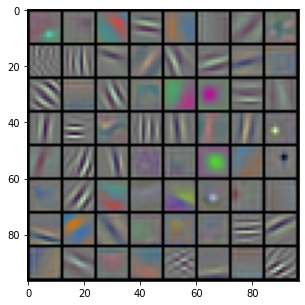

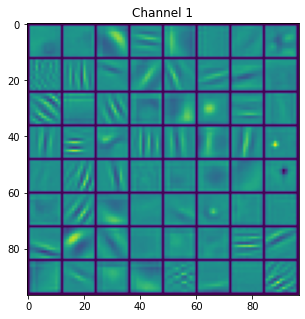

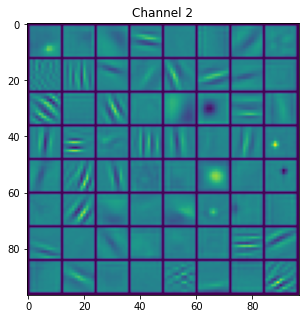

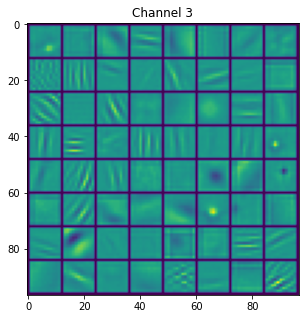

In [42]:
# Ejemplo con primera capa convolucional de AlexNet:

LAYER = 0

conv_layer = model.get_submodule(conv_names[LAYER])

weight_visualization(conv_layer, channel='all')

for ch in range(conv_layer.in_channels):
    weight_visualization(conv_layer, channel=ch)